# Baseline model analysis - latent dim

In [1]:
import os

os.chdir("../..")

In [2]:
!pwd

/Users/wiktorlazarski/Desktop/my_project/edge-aware-face-autoencoder


In [3]:
import torch
import torchvision
import torchvision.transforms.functional as F

import face_autoencoder.model as mdl
import face_autoencoder.image_processing as ip
import scripts.training.data_loading as dl

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 10)
plt.rcParams["image.cmap"] = "gray"
plt.rcParams['savefig.facecolor'] = "white"

%load_ext autoreload
%autoreload 2

In [4]:
TEST_DSET_PATH = os.path.join(".", "data", "dataset", "test")

MODEL_PATH = os.path.join(".", "face_autoencoder", "model", "baseline-256px-512ld-100kreco.ckpt")

In [5]:
dset = dl.CelebAFaceAutoencoderDataset(
    dataset_root=TEST_DSET_PATH,
    preprocess_pipeline=ip.PreprocessingPipeline(nn_input_image_resolution=256)
)

vae = mdl.VanillaVAE.load_from_checkpoint(ckpt_path=MODEL_PATH)
vae.eval()

"Model loaded"

'Model loaded'

In [6]:
zs = []
for image in dset:
    z, _, _ = vae.encoder(image.unsqueeze(0))
    z = z.detach().squeeze().numpy()
    zs.append(z)

In [7]:
len(zs)

3000

In [8]:
16*32

512

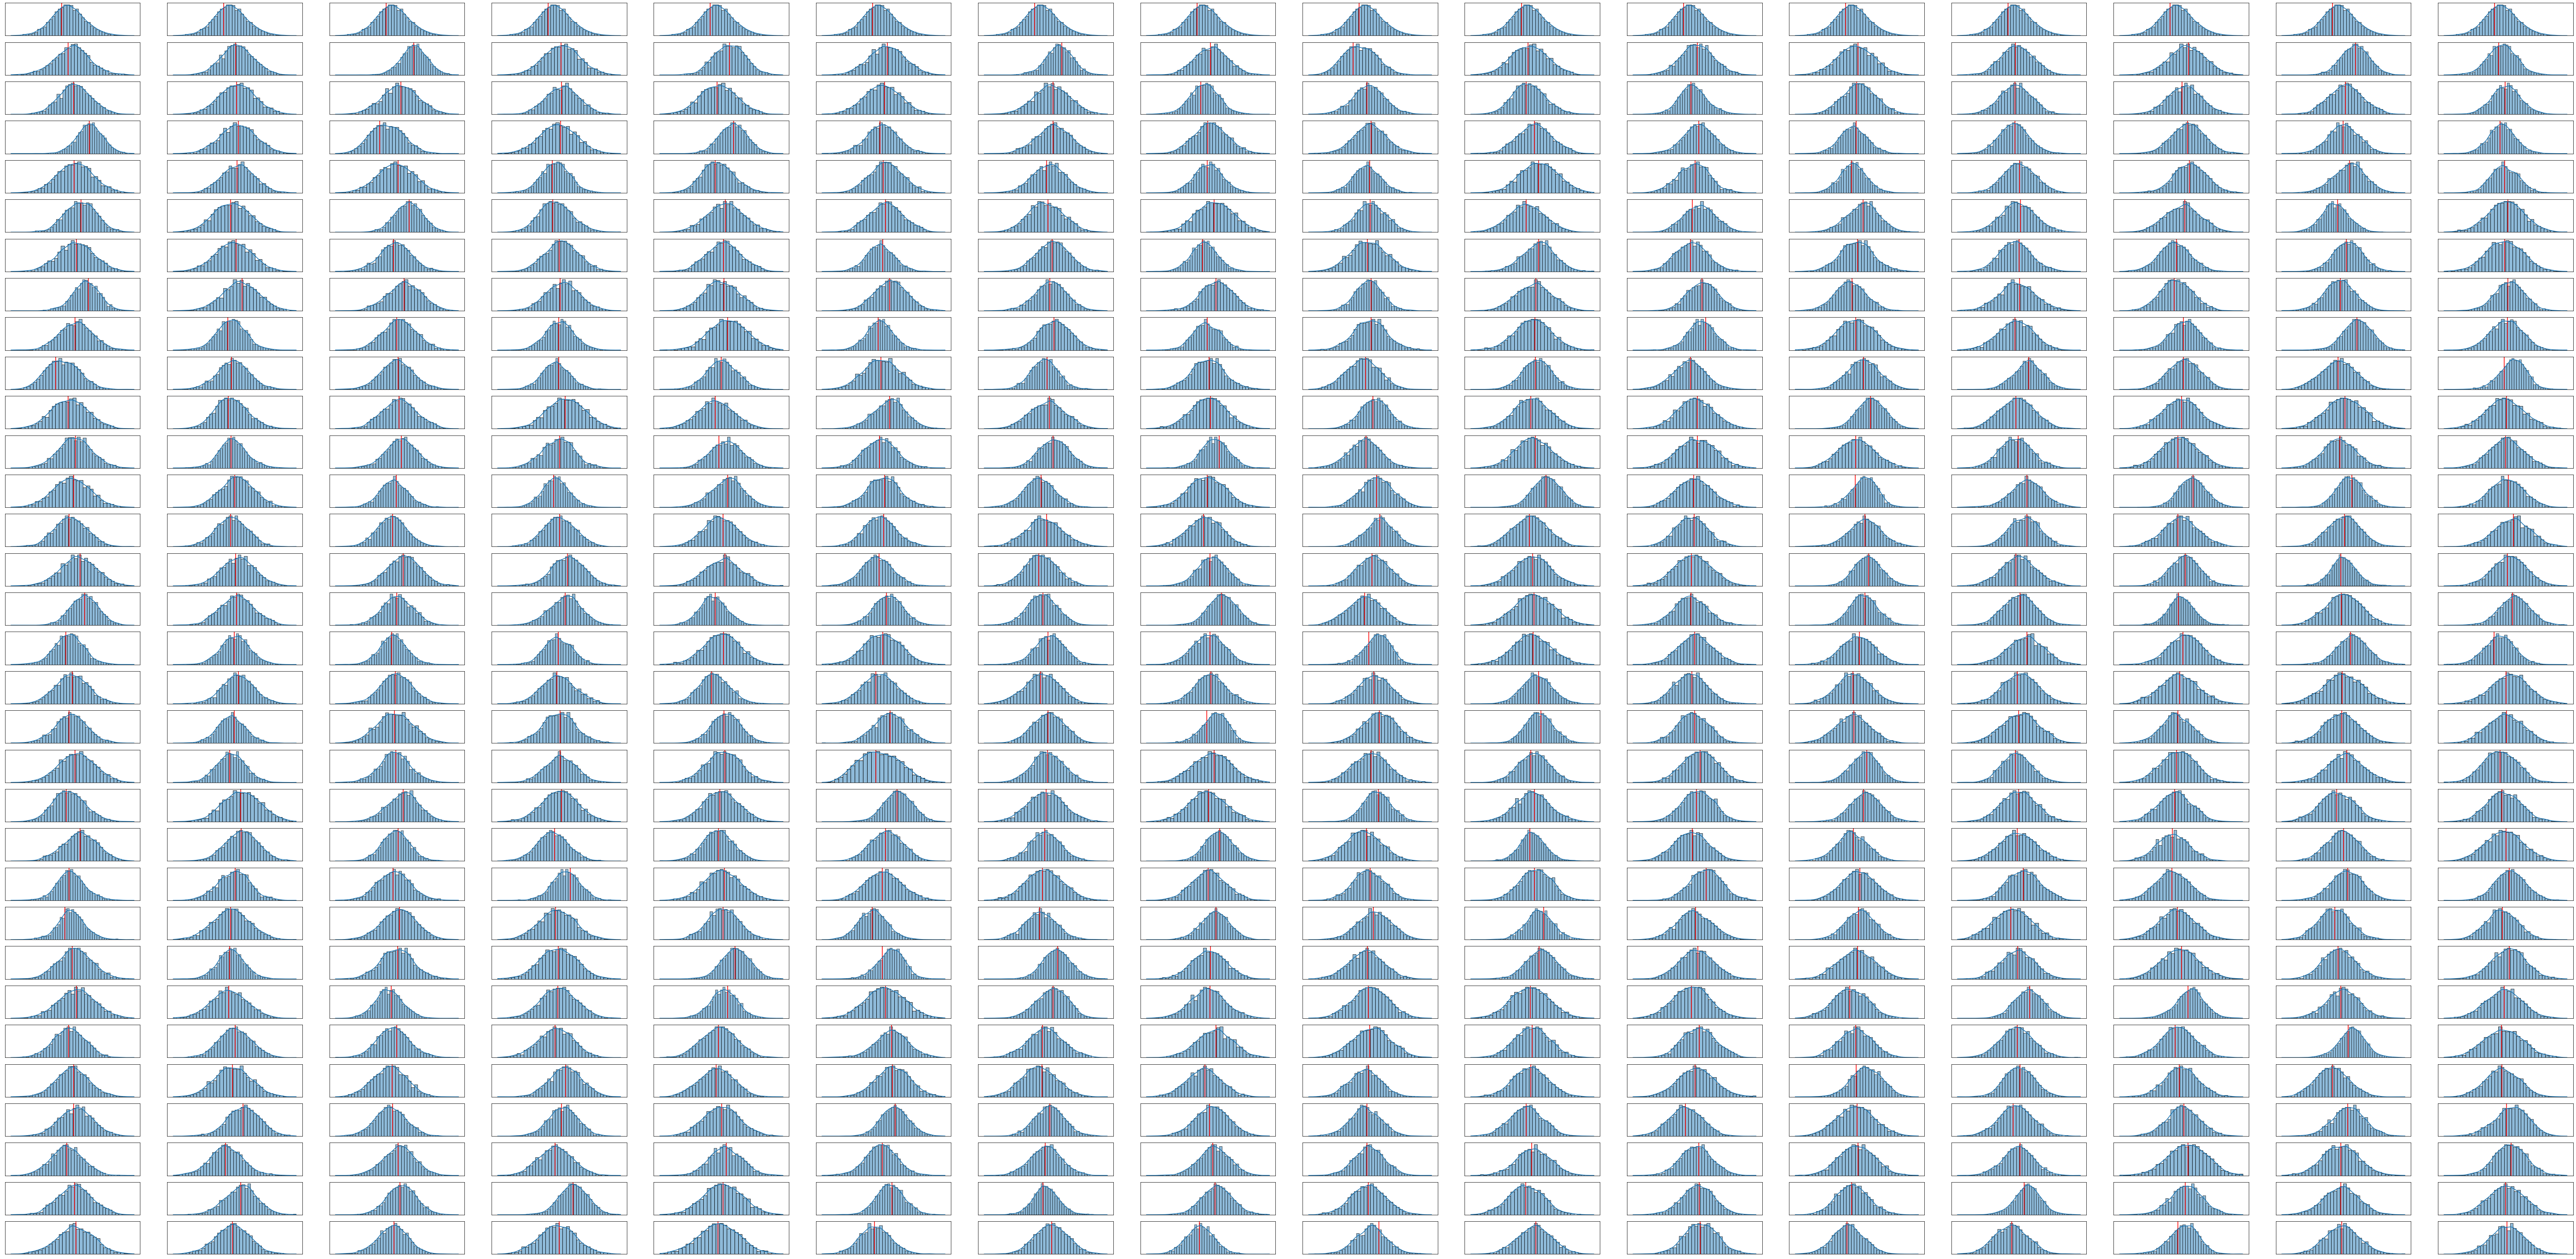

In [9]:
f, ax = plt.subplots(32, 16, figsize=(100, 50))

for i in range(16):
    for j in range(32):
        ax[j,i].axes.yaxis.set_visible(False)
        ax[j,i].axes.xaxis.set_visible(False)
        ax[j,i].axvline(x=0.0, color="red")
        sns.histplot(data=[z[i*j+j] for z in zs], kde=True, stat="probability", ax=ax[j,i])
        
f.savefig("dims.png", format="png", bbox_inches="tight")